In [49]:
# JONATHAN FENG
# DA 420
# 6/6/2021

# Initial Imports
from __future__ import division, print_function

import numpy as np
from scipy.stats import nbinom

In [50]:
# Additional Imports
import random
import socket
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
def simulator(home_mean, away_mean, niterations):
    # estimates probability of home team win
    np.random.seed(123)  # set to obtain reproducible results
    home_game_score = [0] * niterations
    away_game_score = [0] * niterations
    home_win = [0] * niterations
    i = 0
    while (i < niterations):
        home_game_score[i] = \
            nbinom.rvs(n = 4.0, p = 4.0/(4.0 + home_mean), size = 1)[0] 
        away_game_score[i] = \
            nbinom.rvs(n = 4.0, p = 4.0/(4.0 + away_mean), size = 1)[0]         
        if (home_game_score[i] > away_game_score[i]):
            home_win[i] = 1
        if ((away_game_score[i] > home_game_score[i]) or \
            (away_game_score[i] < home_game_score[i])):
            i = i + 1 
    n_home_win = sum(home_win)
    return n_home_win / niterations        
 
niterations = 10  # use smaller number for testing
# probability matrix for results... home team rows, away team columns
probmat = np.array([[0.0] * 9] * 9)

In [52]:
# matrix representation of home and away team runs for table
homemat = np.array([[9] * 9, [8] * 9, [7] * 9, [6] * 9, [5] * 9,\
    [4] * 9, [3] * 9, [2] *9, [1] * 9])
awayrow = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])    
awaymat = np.array([awayrow] * 9)

In [53]:
# generate table of probabilities
for index_home in range(9):
    for index_away in range(9):
        if (homemat[index_home,index_away] != awaymat[index_home,index_away]):
            print(index_home, index_away)
            probmat[index_home, index_away] = \
                simulator(float(homemat[index_home, index_away]), \
                          float(awaymat[index_home, index_away]), niterations)
            
print(probmat)   

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 8
2 0
2 1
2 2
2 3
2 4
2 5
2 7
2 8
3 0
3 1
3 2
3 3
3 4
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 5
4 6
4 7
4 8
5 0
5 1
5 2
5 4
5 5
5 6
5 7
5 8
6 0
6 1
6 3
6 4
6 5
6 6
6 7
6 8
7 0
7 2
7 3
7 4
7 5
7 6
7 7
7 8
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
[[1.  1.  0.9 0.7 0.7 0.9 0.9 0.4 0. ]
 [1.  1.  0.8 1.  0.9 0.7 0.9 0.  0.4]
 [0.9 1.  0.9 0.9 0.6 0.6 0.  0.6 0.5]
 [0.9 1.  0.9 0.8 0.8 0.  0.6 0.4 0.4]
 [0.9 0.9 0.9 0.7 0.  0.1 0.3 0.3 0.4]
 [0.8 0.7 0.6 0.  0.5 0.5 0.3 0.1 0.3]
 [0.9 0.5 0.  0.3 0.1 0.2 0.3 0.1 0.2]
 [0.8 0.  0.4 0.2 0.  0.1 0.  0.  0. ]
 [0.  0.3 0.  0.3 0.1 0.1 0.  0.  0. ]]


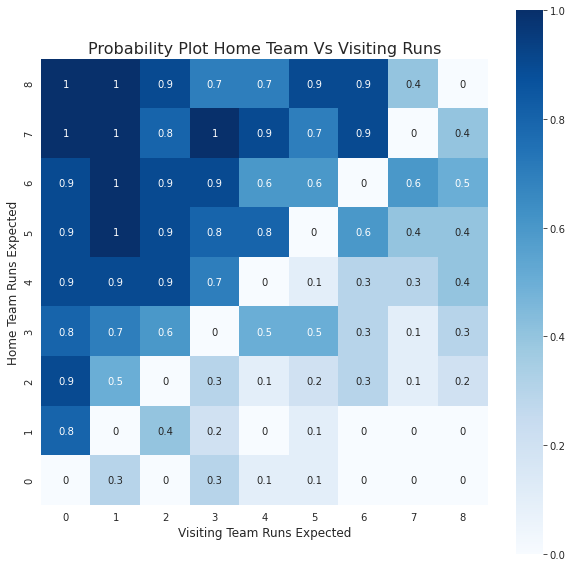

In [73]:
with sns.axes_style("white"):
    plot = plt.subplots(figsize=(10, 10))
    plot= sns.heatmap(probmat, vmax=1, square=True, cmap='Blues', annot=True, yticklabels=[8,7,6,5,4,3,2,1,0])
plt.title('Probability Plot Home Team Vs Visiting Runs', fontsize= 16)
plt.xlabel('Visiting Team Runs Expected', fontsize= 12)
plt.ylabel('Home Team Runs Expected', fontsize= 12)
plt.xlim([0,9])

plt.show()